## TP 3 : Erreurs d'arrondi

Dans ce TP, on se concentrera sur les erreurs d'arrondi. On s'intéressera aux erreurs d'arrondi qui apparaissent dans la recherche et l'évaluation des racines de polynômes et dans le calcul des dérivées de fonctions analytiques.

## Exercice 1 :  Erreurs d'arrondi et racines d'un polynôme.

Dans cet exercice, on veut trouver les racines d'un polynôme, c.-à-d. résoudre
$$
p(x)=\sum_{i=0}^n a_ix^i=0.
$$
Il est bien connu qu'un polynôme de  degré $n$ a $n$ racines $x_1\, ,\, x_2\, \dots,\, x_n \in\mathbb{C}$.

### Exercice 1 a)
 > Pour $p(x)=a_0 + a_1x + a_2x^2$, on peut trouver ses racines en utilisant la formule suivante
$$
x_{1,2}=\frac{-a_1\pm \sqrt{a_1^2-4a_0a_2}}{2a_2}.
$$
> Appliquer la formule pour $p(x) = (x-10^{m})(x-10^{-m})$. Tracez l'erreur relative de $x_1$, $x_2$ par rapport aux vraies valeurs des racines pour $m=1,\dots,12$.  
>
> _Explication_: Quand $a_1$ et $\sqrt{a_1^2-4a_0a_2}$ sont du même ordre de grandeur, des annulations vont apparaître dans l'opération  $-a_1\pm \sqrt{a_1^2-4a_0a_2}$.
---

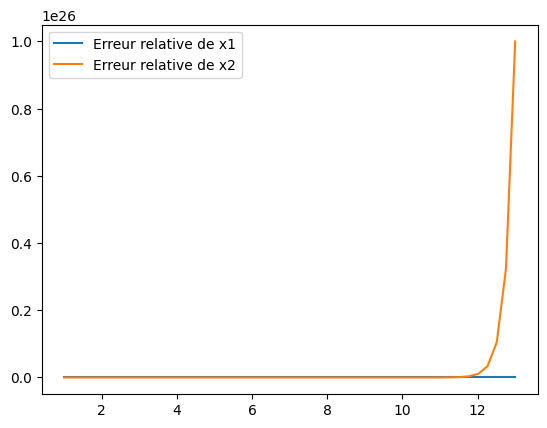

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sol_quadratic(coeff):
    """
    Calcule les racines d'un polynôme quadratique à coefficients `coeff`

    `coeff` est une liste, et son premier élément est le coefficient du monomial
    de degré 2.
    """
    a0, a1, a2 = coeff
    # VOTRE CODE ICI
    x1 = (-a1 - np.sqrt(a1**2 - 4 * a0 * a2))/2 * a2
    x2 = (-a1 + np.sqrt(a1**2 - 4 * a0 * a2))/2 * a2
    return x1, x2


errors1 = []
errors2 = []
m_vals = np.linspace(1, 13, 50)
for m in m_vals:
    x1, x2 = sol_quadratic([1, -(10.0 ** (-m)) - 10.0**m, 1])
    errors1.append(abs(x1 - 10**m) / 10.0**m)
    errors2.append(abs(x2 - 10 ** (-m)) * 10.0**m)


plt.plot(m_vals, errors1, label="Erreur relative de x1")
plt.plot(m_vals, errors2, label="Erreur relative de x2")
plt.legend()


> _Réflexion_ : L'une des deux racines est trouvée avec précision, et l'autre ne l'est pas. Pourquoi pensez-vous que c'est le cas ?

> C'est peut-être due au fait que d'un côté, on a des erreurs causés par l'epsilon machine, car les calculs se font par approximation, tandis que dans l'autre cas, on a des termes qui s'annule, ce qui rend le calcul précis...

> Réflexion : La méthode s'effondre aux alentours de $m=8$. Pourquoi à cette valeur ?

> Je ne sais pas...

### Exercice 1b) 
On peut utiliser la méthode de Newton (qui sera étudiée plus en détail plus tard dans le cours) pour calculer itérativement les racines d'une fonction $p(x)$ en utilisant la formule suivante :
$$
    x_{n+1}=x_n-\frac{p(x_n)}{p'(x_n)},
$$

----
> Implémentez `methode_newton`, selon la description ci-dessous. Elle devrait afficher un avertissement si elle ne converge pas. Calculez $x_1$ et $x_2$ en utilisant la question précédente, et introduisez-les dans la méthode de Newton comme valeurs initiales avec $p(x)$ le polynôme de l'exercice précédent pour $m=10$. 
>
> La méthode converge-t-elle pour les deux valeurs ? L'application de la méthode de Newton a-t-elle amélioré le résultat ?
----

_Indice : utilisez `np.polyval(coeff, x)` pour évaluer un polynôme, et utilisez `np.polyder(coeff)` pour obtenir les coefficients de la dérivée d'un polynôme._

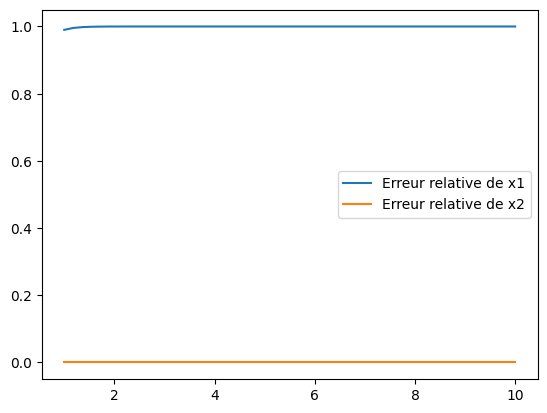

In [7]:
def newtons_method(coeff, x0, tol=1e-8, maxiter=100):
    """
    Calculer la racine d'un polynôme par la méthode de Newton

    Les coefficients du polynôme sont donnés par `coeff` sous forme de liste où
    le premier élément est le coefficient du monomial de plus haut degré.

    La valeur initiale est `x0`.

    Après chaque itération, nous vérifions si `abs(p(x)) < tol`, si c'est le
    cas, on retourne `x`.

    Si après `maxiter` itérations on n'a pas trouvé de solution à cette
    tolérance, on informe l'utilisateur via une instruction print que la méthode
    n'a pas convergé.
    """
    # VOTRE CODE ICI
    value = x0
    for i in np.arange(100):
        value = value - np.polyval(coeff, value)/np.polyval(np.polyder(coeff), value)
        if (np.abs(np.polyval(coeff, value)) <= tol):
            return value
    print("Cela n'a pas convergé...")
    return value



# VOTRE CODE ICI
errors1 = []
errors2 = []
m_vals = np.linspace(1, 10, 50)
for m in m_vals:
    x1, x2 = newtons_method([1, -(10.0 ** (-m)) - 10.0**m, 1], 0), newtons_method([1, -(10.0 ** (-m)) - 10.0**m, 1], 1)
    errors1.append(abs(x1 - 10**m) / 10.0**m)
    errors2.append(abs(x2 - 10 ** (-m)) * 10.0**m)


plt.plot(m_vals, errors1, label="Erreur relative de x1")
plt.plot(m_vals, errors2, label="Erreur relative de x2")
plt.legend()


Pour des polynômes de degré $n$, on peut utiliser la fonction `np.roots` pour calculer plus précisement les racines numériquement. Pour construire des polynômes, on peut utiliser `np.polymul` pour obtenir les coefficients des produits de deux polynômes. Par exemple ci-dessous on construit le polynôme $(x^2-2)^3$ et on calcule ses racines.


In [4]:
poly = [1.0]  # Commencer avec p(x) = 1.0
for i in range(3):
    poly = np.polymul(poly, [1, 0, -2])  # Multiplier par (x^2 - 2)
print(f"Les coefficients de (x**2-2)**3: {poly}")
racines = np.roots(poly)
print(f"Les racines de (x**2-2)**3: {racines}")


Les coefficients de (x**2-2)**3: [ 1.  0. -6.  0. 12.  0. -8.]
Les racines de (x**2-2)**3: [-1.4142085 +0.00000000e+00j -1.41421609+4.38304825e-06j
 -1.41421609-4.38304825e-06j  1.41421986+0.00000000e+00j
  1.41421041+5.45805553e-06j  1.41421041-5.45805553e-06j]


Observez que les racines sont des nombres complexes. En précision infinie, on devrait obtenir les racines $\sqrt{2}$ et $-\sqrt{2}$, ainsi les parties imaginaires de ces racines devraient être égales à 0. Pourtant, certaines des racines trouvées par `np.roots` ont une partie imaginaire non nulle en raison d'erreurs d'arrondi.

### Exercice 1c)
> Trouvez les racines du polynôme de Wilkinson perturbé : 
$$
  p_\delta (x)=\prod_{i=1}^{20}(x-i)+ \delta\cdot  x^{19},
$$
> ou $\delta$ est un parmètre de perturbation. 
>
> Tracez le résultat dans le plan complexe pour $\delta=0,\,10^{-4},\,10^{-8},\,10^{-16}$.
>
> _Indication_ : Vous pouvez utiliser `np.real` et `np.imag` pour obtenir les parties réelles et imaginaires d'un nombre ou d'un array.
---- 

**Important** : assurez-vous que les coefficients du polynôme de Wilkinson soient stockés en format virgule flottante et non en format entier, sinon vous risquez d'obtenir des résultats imprécis.

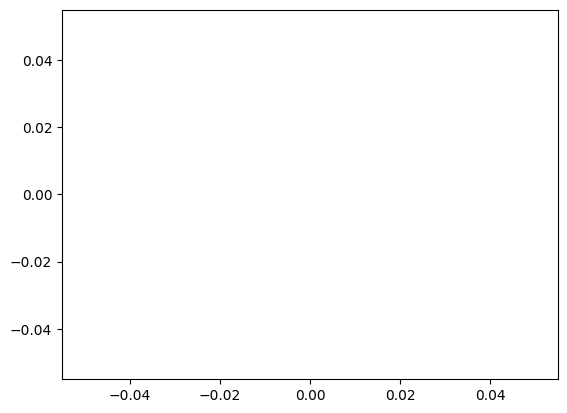

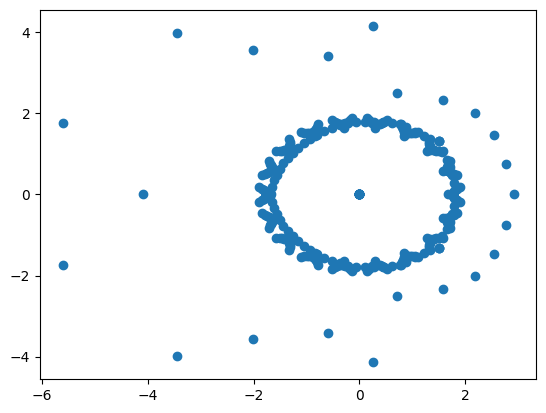

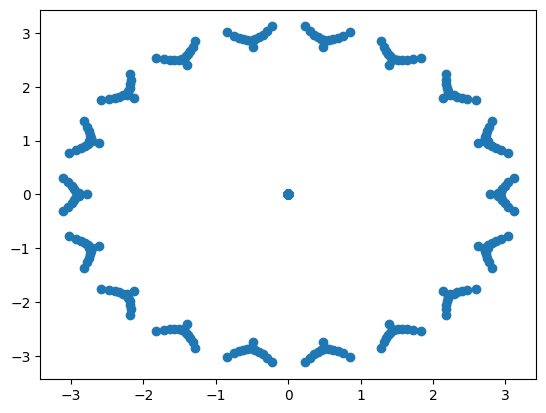

/home/raleigh/.local/lib/python3.9/site-packages/numpy/lib/polynomial.py:253: RuntimeWarning: overflow encountered in divide
  A[0,:] = -p[1:] / p[0]


LinAlgError: Array must not contain infs or NaNs

In [10]:
from copy import copy

# Vous pouvez utiliser la fonction copy pour copier une liste comme ceci :
# liste2 = copy(liste1)

# VOTRE CODE ICI
for delta in [0.0, 10**(-4), 10**(-8), 10**(-16)]:
    poly = [1.0]
    for i in np.arange(1, 21):
        poly = np.polymul(poly, [delta, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1 - i])
    racines = np.roots(poly)
    x = []
    y = []
    for i in np.arange(len(racines)):
        x.append(np.real(racines[i]))
        y.append(np.imag(racines[i]))
    plt.plot(x, y, 'o')
    plt.show()


### Exercice 1d)
Remarquez que l'on peut écrire 
$$
    p_\delta (x)=\prod_{i=1}^{20}(x-i)+ \delta\cdot  x^{19} =\prod_{i=1}^{20}(x-x_i)
$$
avec $x_i$ les racines.On peut traiter $x_i(\delta)$ comme une fonction de $\delta$, et on a
$$
\frac{d x_i}{d \delta} \,\bigg|_{\delta=0}
= \frac{x_i^{19}}{\prod_{j\neq i} (x_j-x_i)}\bigg|_{\delta=0}
= \prod_{j\neq i} \frac{i}{j-i}.
$$

Ici $\left|\dfrac{d x_i}{d \delta} \right |_{\delta=0}$ mesure la condition (en sens absolu) des racines  $x_i(0)=i$, c.-à-d., la sensibilité de $x_i$ aux perturbations par $\delta$. 

----
> Calculer la sensibilité de toutes les racines $x_i$ en utilisant la formule ci-dessus. Utilisez cette dernière pour expliquer vos observations de la figure que vous avez faite dans l'exercice précédent.
>
> Écrivez votre explication sous forme de commentaire ou de cellule markdown. 
---- 

In [ ]:
# VOTRE CODE ICI


## Exercice 2 : Approcher la dérivée

On veut approximer numériquement les dérivées de fonctions analytiques en utilisant les différences finies.

--- 
> Ecrivez deux fonctions `diff_reel` et `diff_complex` qui approximent respectivement la dérivée d'une fonction analytique en utilisant les formules suivantes :

$$
    \texttt{diff_reel}(x_0,h,f) := \frac{f(x_0+h) - f(x_0)}{h}
$$
$$
    \texttt{diff_complex}(x_0,h,f) := \mathrm{Im}\left( \frac{f(x_0+ih)}{h}\right)
$$
>   Implémentez `diff_reel` et `diff_complex`. Essayez votre implémentation sur la fonction
$$
    f(x) = \frac{x^2 \cos^3 x + \sin^3 x }{e^x}
$$
> en $x_0 = \pi/4$. 
>
> Tracer l'erreur d'approximation des dérivées en fonction de $h$ pour $h$ entre $10^{-16}$ et $1$. 
Utilisez un tracé logarithmique, et ajoutez les courbes $y=h$ et $y=h^2$ au tracé. 
>
> _Conseil_ : Vous pouvez utiliser `sympy` pour calculer la dérivée de $f$ si vous ne voulez pas la calculer à la main. 
---


In [ ]:
# VOTRE CODE ICI
from sympy.abc import x
import sympy


> _Réflexion:_ En précision infinie, la première méthode satisfait $|\texttt{diff_reel}(x_0,h,f) -f'(x_0)| = O(h)$, et la seconde satisfait $|\texttt{diff_complex}(x_0,h,f) -f'(x_0)| = O(h^2)$. Essayez de déduire ce résultat vous-même.

> _Réflexion:_ Pourquoi est-ce que la première méthode suit la ligne $O(h)$ mais remonte pour de petites valeurs de $h$ ? 

## Exercice 3 : Méthode de Horner

Dans cet exercice, on va implémenter la méthode de Horner pour évaluer des polynômes. On rappelle que la règle de Horner est donnée par
$$
    a_n x^n + a_{n-1}x^{n-1}+\cdots+ a_1x+a_0 = a_0 + x(a_1+x(a_2+x(a_3+\cdots+x(a_{n-1}+xa_n))))
$$
Cette formule peut être utilisée pour évaluer un polynôme en utilisant $n$ opérations d'addition et de multiplication, ce qui la rend plus efficace qu'un calcul plus naïf.

### Exercice 3a)
> Implémentez une fonction `methode_horner(coeff, x)` qui évalue un polynôme au point `x` en utilisant la méthode de Horner.

In [ ]:
def methode_horner(coeff, x):
    """
    Calculer la valeur d'un polynôme en x en utilisant la méthode de Horner

    Les coefficients du polynôme sont donnés par `coeff` sous forme de liste où
    le premier élément est le coefficient du monomial de plus haut degré.
    """
    # VOTRE CODE ICI


In [ ]:
def test_methode_horner():
    # Le résultat devrait être équivalent à np.polyval de numpy.
    coeff = [1, 2, 3, 4, 5]
    assert np.allclose(
        np.polyval(coeff, 2), methode_horner(coeff, 2)
    ), "Votre implémentation diffère de np.polyval"
    coeff = np.linspace(3, -5, 10)
    x = 179.57
    assert np.allclose(
        np.polyval(coeff, x), methode_horner(coeff, x)
    ), "Votre implémentation diffère de np.polyval"


test_methode_horner()


### Exercice 3b)
> Tracez le résultat de votre implémentation de la méthode de Horner appliquée au polynôme $p(x) = (x-2)^9$ pour $x\in [2-0.07, 2+0.07]$. Sur le même graphique, tracez également sa vraie valeur calculée en utilisant `(x-2)**9`.

In [ ]:
# VOTRE CODE ICI


### Exercice 3c)

On peut montrer que l'erreur de la méthode de Horner est bornée par :
$$
|p(x) - \widehat p(x)| \leq \frac{2n\varepsilon}{1-2n\varepsilon} \sum_{i=0}^n|a_ix^i|,
$$	
où  $\varepsilon$ est la précision de la machine, et  $\widehat{p}(x)$ est le $p(x)$ calculé en arithmétique flottante.

---
> Tracez la borne supérieure de l'erreur absolue de la méthode de Horner pour $p(x)=(x-2)^9$ pour $x\in [2-0.07,2+0.07]$. Sur la même figure, tracez l'erreur absolue de votre implémentation de la méthode de Horner pour le même polynôme.
----


In [ ]:
EPSILON = np.finfo(np.float64).eps  # epsilon machine


def borne_horner(coeff, x, eps=EPSILON):
    """
    Calculer la borne supérieure de l'erreur de la méthode de Horner en `x`.

    Les coefficients du polynôme sont donnés par `coeff` sous forme de liste où
    le premier élément est le coefficient du monomial de plus haut degré.

    Le paramètre `eps` est l'erreur machine. (defaut : 2.22e-16)
    """
    # VOTRE CODE ICI


# VOTRE CODE ICI
